In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from events_simulation.parameters import *

In [8]:
TRAINING_IDS_FILE = 'data/football-events/training_ids.csv'
TEST_IDS_FILE = 'data/football-events/test_ids.csv'
EVENTS_FILE = 'data/football-events/new_events.csv'

In [9]:
training_ids_df = pd.read_csv(TRAINING_IDS_FILE)[['training_id']]
training_ids_df.head()

,training_id
0,UFot0hit/
1,Aw5DflLH/
2,bkjpaC6n/
3,lOpzwMkp/
4,Wn69eU5B/


In [10]:
events_df = pd.read_csv(EVENTS_FILE)
events_df.head()

,Unnamed: 0,id_odsp,home_team,away_team,0,1,2,3,4,5,...,20,21,22,23,24,25,26,27,28,29
0,0,004f4ING/,Southampton,Swansea,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,004f4ING/,Southampton,Swansea,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,004f4ING/,Southampton,Swansea,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,3,004f4ING/,Southampton,Swansea,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,4,004f4ING/,Southampton,Swansea,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
event_type_to_sentence = {}
sides = ['home', 'away']
for i, side in enumerate(sides):
    for event_type in range(NB_EVENT_TYPES):
        if event_type == 0:
            sentence = "Goal %s." % side
        elif event_type == 1:
            sentence = "Shot %s." % side
        elif event_type == 2:
            sentence = "Corner %s." % side
        elif event_type == 3:
            sentence = "Foul %s." % side
        elif event_type == 4:
            sentence = "Yellow card %s." % side
        elif event_type == 5:
            sentence = "2nd yellow card %s." % side
        elif event_type == 6:
            sentence = "Red card %s." % side
        elif event_type == 7:
            sentence = "Substitution %s." % side
        elif event_type == 8:
            sentence = "Free kick %s." % side
        elif event_type == 9:
            sentence = "Offside %s." % side
        elif event_type == 10:
            sentence = "Hand ball %s." % side
        elif event_type == 11:
            sentence = "Penalty conceded %s." % side

        event_type_to_sentence[event_type + i * NB_EVENT_TYPES] = sentence

event_type_to_sentence[NB_EVENT_TYPES * 2] = "No event this minute."
event_type_to_sentence[NB_EVENT_TYPES * 2 + 1] = "Game is over."
event_type_to_sentence[NB_EVENT_TYPES * 2 + 2] = "Game is starting."

In [12]:
def event_type_to_string(event_type):
    return event_type_to_sentence[event_type]

(1265680, 30)


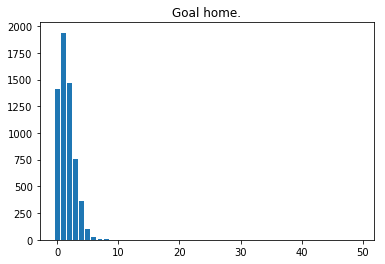

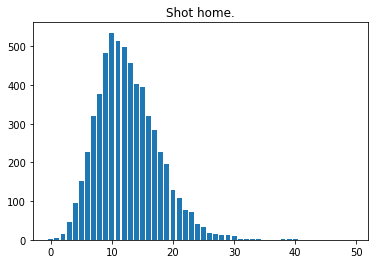

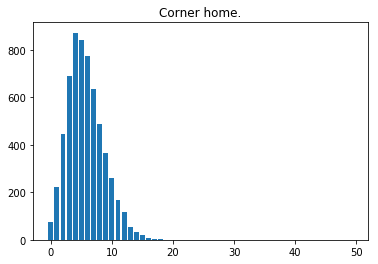

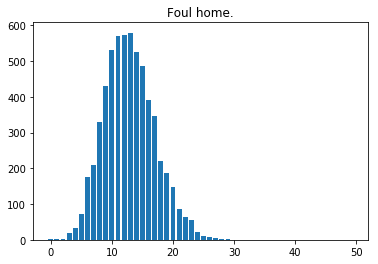

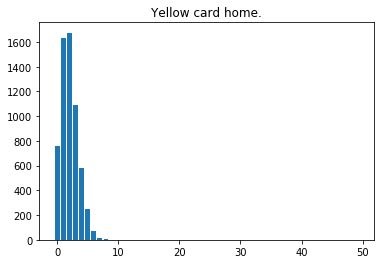

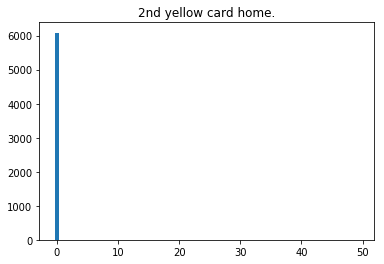

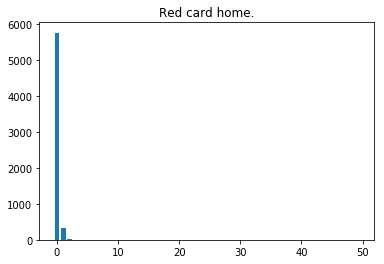

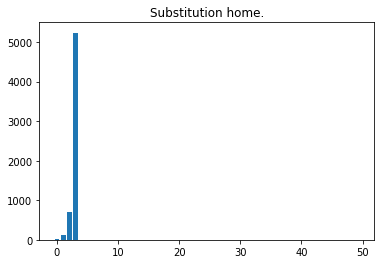

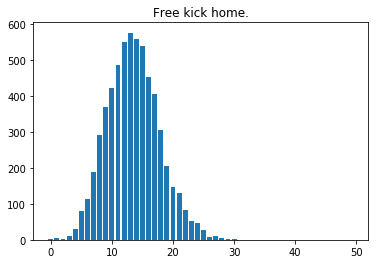

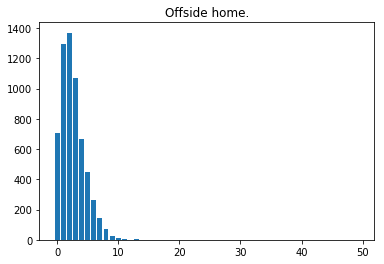

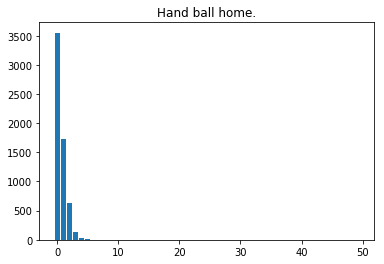

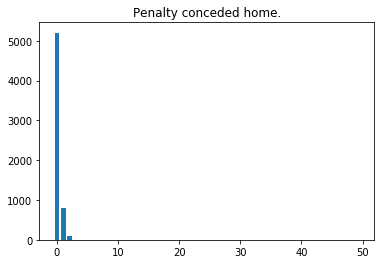

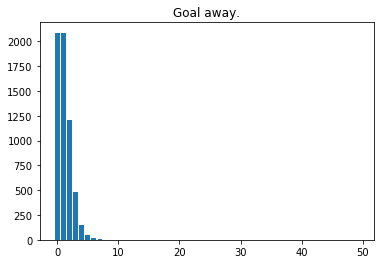

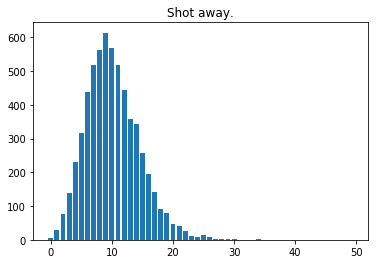

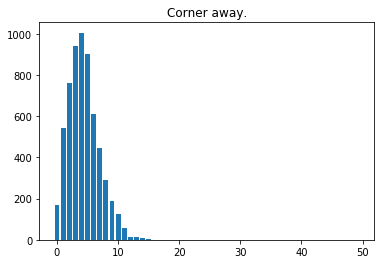

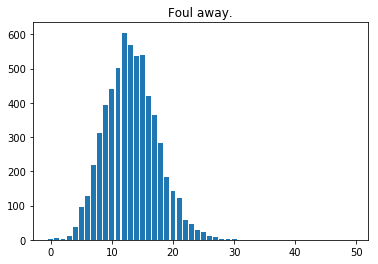

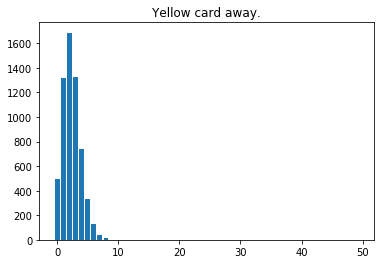

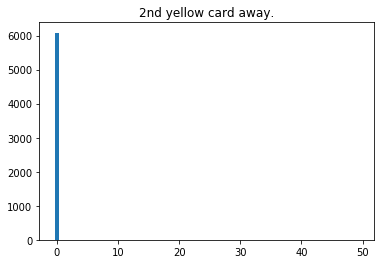

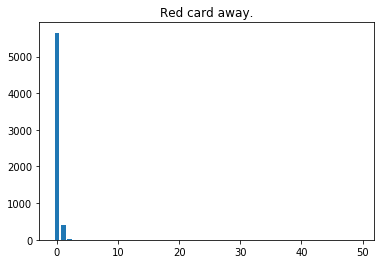

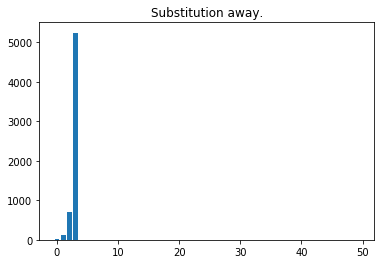

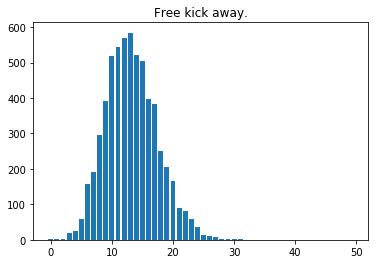

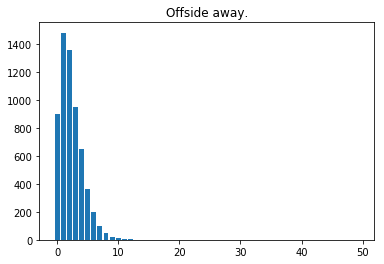

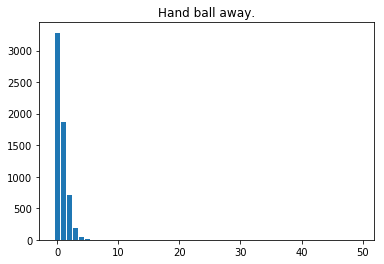

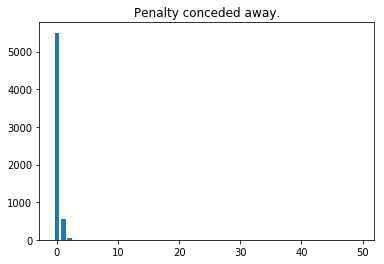

In [15]:
def get_event_distr(ids_to_df, event_type, max_nb_event=50):
    #events_and_times_df = events_df.loc[:, '0':]
    event_distr = [0] * max_nb_event
    for idd, df in ids_to_df.items():
        event_df = df[df[str(event_type)] == 1]
        event_distr[len(event_df)] += 1
        
    return event_distr

training_events_distr = []
events_df = events_df[events_df['id_odsp'].isin(training_ids_df['training_id'].values)]
events_and_times_df = events_df.loc[:, '0':]
print(events_and_times_df.shape)
for event_type in range(NB_ALL_EVENTS - 3):
    ids_to_df = {key: events_df.loc[value] for key, value in events_df.groupby("id_odsp").groups.items()}
    event_distr = get_event_distr(ids_to_df, event_type)
    training_events_distr.append(event_distr)
    '''
    plt.bar(x=[i for i in range(len(event_distr))], height=event_distr)
    plt.title(event_type_to_string(event_type))
    plt.show()
    '''
    

In [16]:
test_ids_df = pd.read_csv(TEST_IDS_FILE)[['test_id']]
test_ids_df.head()

,test_id
0,tr68gYbd/
1,YygfHyi3/
2,pGCaefUq/
3,hv9eFFLF/
4,fofjIHyc/
